# Métodos Numéricos para Equações Diferenciais II – 2023/2

**Aluno:** Matheus de Costa Harduim.

**Professor:** Grazione de Souza.

**Instituição:** UERJ – IPRJ – DMC

### Desenvolvimento dos códigos e comentários.

Importando as bibliotecas do python que serão utilizadas

In [1]:
import numpy.matlib
import numpy as np
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import optimize

# Trabalho 3

### Forward Time-Backward Space (FTBS)

## Dados do problema
- $u = 0.25$
- ${C}_{A} = 1,0 $ 
- ${C}_{B} = 0,0 $
- ${L}_{x} = 10m$
- ${t}_{total} = 5$
- $\Delta x = 0,05$
- $\%\ de\ avanço = 1/2$

Inicializando a variáveis

In [249]:
u = 0.25
ca = 1.0
cb = 0.0
lX = 10.0
tTotal = 5
deltX = 0.05
porcAvan = 1/2
# percentual de como os volumes estam preenchidos

In [250]:
def metodoEx(u,ca,cb,lX,tTotal,deltX,porcAvan):
    # definicao do numero de volumes
    nx = int(lX/deltX)
    print(f'numero de volumes: {nx}')
    # definicao deltaT e passos de tempo
    # Considerando a condição de tempo do qual o método é estável
    deltT = 0.8*(1 /((u/deltX)))
    n = int(tTotal/deltT)
    print(f'valor passo de tempo deltaT: {deltT}')
    print(f'numero de passos de tempo: {n}')
    # inicializando o vetor considerando as condicoes de contorno
    qInit = []
    for i in range(nx):
        if i < int(nx*porcAvan):
            qInit.append(ca)
        if i >= int(nx*porcAvan):
            qInit.append(cb)
    # inicia o c iterativo
    #---------------------
    cItr = ca
    qFinal = qInit
    espaco = [0.0]
    for k in range(nx-1):
        espaco.append(espaco[k] + deltX)
    for i in range(n):
        qItr = []
        #-----------------
        #definição de mudança de vazão
        if i >= n/2:
            cItr = ca*1.2
        q0 = 2*cItr - qFinal[0]
        for j in range(nx):
            if j == 0:
                qItr.append(
                    qFinal[j] - (deltT/deltX)*
                    (u*(qFinal[j]-q0)))
            elif j == nx-1:
                qItr.append(qFinal[j] - (deltT/deltX)*
                            (u*(qFinal[j]-qFinal[j-1])))
            else:
                qItr.append(qFinal[j] - (deltT/deltX)*
                            (u*(qFinal[j]-qFinal[j-1])))
        qFinal = qItr
    return espaco, qFinal
    

In [251]:
x, Qs = metodoEx(u,ca,cb,lX,tTotal,deltX,porcAvan)

numero de volumes: 200
valor passo de tempo deltaT: 0.16000000000000003
numero de passos de tempo: 31


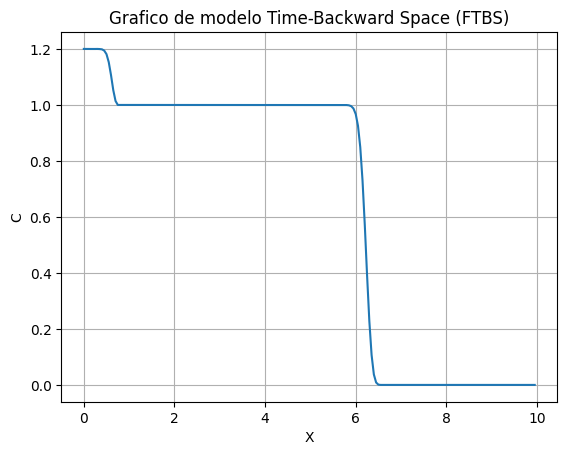

In [252]:
plt.figure()
plt.title(f'Grafico de modelo Time-Backward Space (FTBS)')
plt.plot(x,Qs)
plt.xlabel('X')
plt.ylabel('C')
plt.grid()
plt.show()

## Teste variação da velocidade de advecção
- $u = varia$
- $ \alpha = 0,1$
- ${C}_{A} = 1,0 $ 
- ${C}_{B} = 0,0 $
- ${L}_{x} = 10m$
- ${t}_{total} = 5$
- $\Delta x = 0,05$
- $\%\ de\ avanço = 1/2$

In [253]:
us = 0.25*np.array([0.6,0.8,1.0,1.2,1.4])
alpha = 0.1
ca = 1.0
cb = 0.0
lX = 10.0
tTotal = 5
deltX = 0.05
porcAvan = 1/2
# percentual de como os volumes estam preenchidos

numero de volumes: 200
valor passo de tempo deltaT: 0.2666666666666667
numero de passos de tempo: 18
numero de volumes: 200
valor passo de tempo deltaT: 0.2
numero de passos de tempo: 25
numero de volumes: 200
valor passo de tempo deltaT: 0.16000000000000003
numero de passos de tempo: 31
numero de volumes: 200
valor passo de tempo deltaT: 0.13333333333333336
numero de passos de tempo: 37
numero de volumes: 200
valor passo de tempo deltaT: 0.11428571428571431
numero de passos de tempo: 43


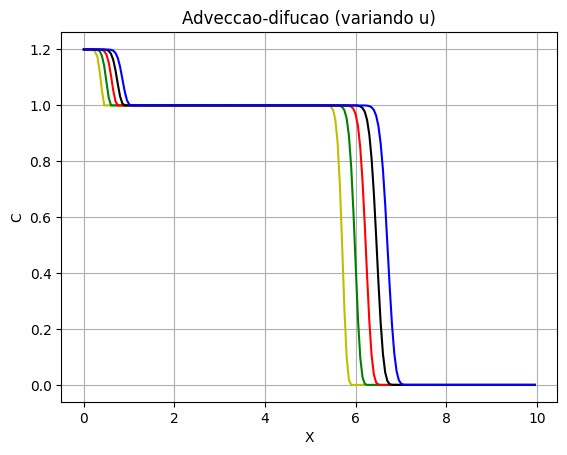

In [254]:
QsItr = []
xItr = []
for u in us:
    x, Qs = metodoEx(u,ca,cb,lX,tTotal,deltX,porcAvan)
    xItr = x
    QsItr.append(Qs)
    
i = 0
plt.figure()
colors = ['y','g','r','k','b','c']
plt.title(f'Adveccao-difucao (variando u)')
for u in us:
    plt.plot(xItr,QsItr[i], color = colors[i])
    i+=1
plt.xlabel('X')
plt.ylabel('C')
plt.grid()
plt.show()

## Teste variação do Lx
- $u = 0,25$
- $ \alpha = varia$
- ${C}_{A} = 1,0 $ 
- ${C}_{B} = 0,0 $
- ${L}_{x} = varia$
- ${t}_{total} = 5$
- $\Delta x = 0,05$
- $\%\ de\ avanço = 1/2$

In [255]:
u = 0.25
alpha = 0.1
ca = 1.0
cb = 0.0
lXs = 10.0*np.array([0.6,0.8,1.0,1.2,1.4])
tTotal = 5
deltX = 0.05
porcAvan = 1/2
# percentual de como os volumes estam preenchidos

numero de volumes: 120
valor passo de tempo deltaT: 0.16000000000000003
numero de passos de tempo: 31
numero de volumes: 160
valor passo de tempo deltaT: 0.16000000000000003
numero de passos de tempo: 31
numero de volumes: 200
valor passo de tempo deltaT: 0.16000000000000003
numero de passos de tempo: 31
numero de volumes: 240
valor passo de tempo deltaT: 0.16000000000000003
numero de passos de tempo: 31
numero de volumes: 280
valor passo de tempo deltaT: 0.16000000000000003
numero de passos de tempo: 31


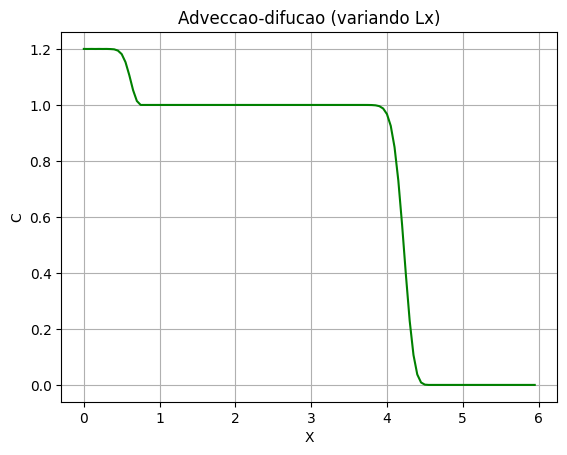

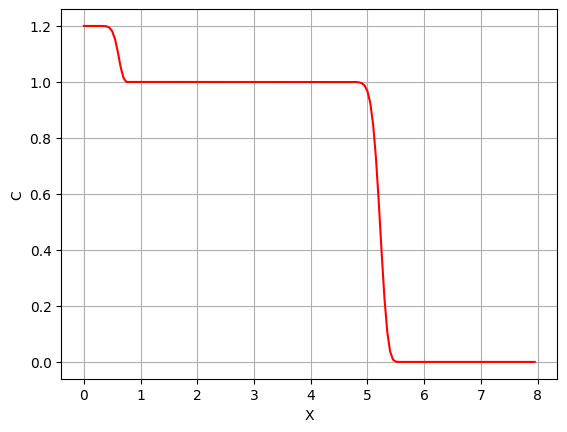

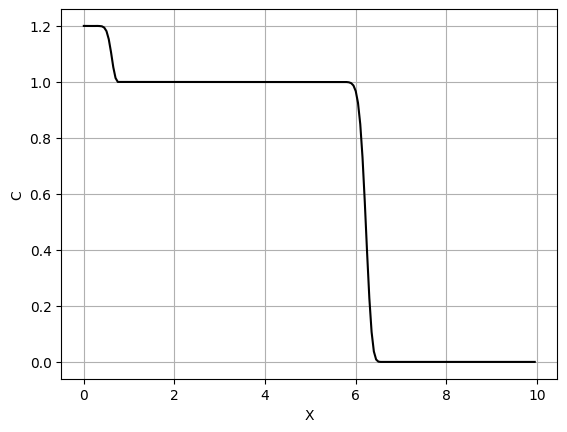

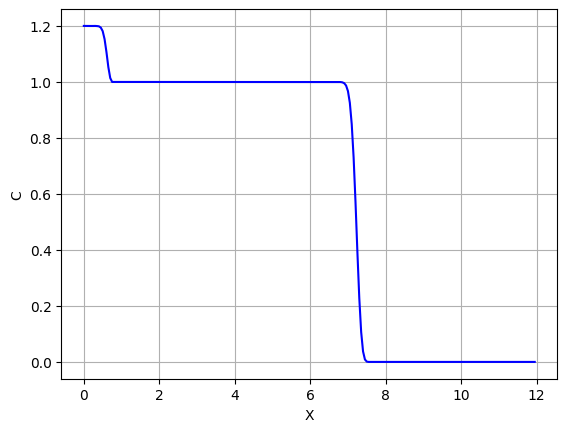

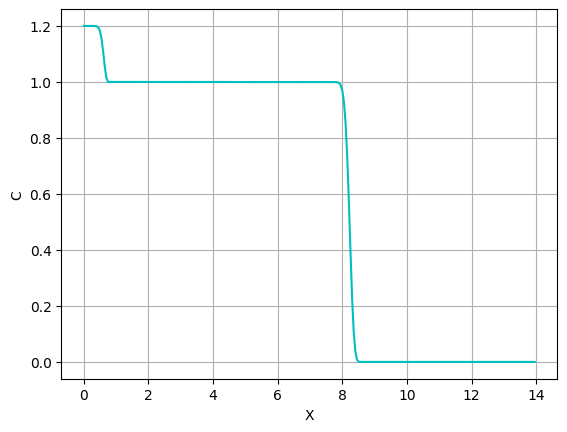

In [256]:
QsItr = []
xItr = []
for lX in lXs:
    x, Qs = metodoEx(u,ca,cb,lX,tTotal,deltX,porcAvan)
    xItr.append(x)
    QsItr.append(Qs)
    
i = 0
plt.figure()
colors = ['g','r','k','b','c']
plt.title(f'Adveccao-difucao (variando Lx)')

for lX in lXs:
    plt.plot(xItr[i],QsItr[i], color = colors[i])
    plt.xlabel('X')
    plt.ylabel('C')
    plt.grid()
    plt.show()
    i+=1

## Teste variação do tempo totalX
- $u = 0,25$
- $ \alpha = 0,1$
- ${C}_{A} = 1,0 $ 
- ${C}_{B} = 0,0 $
- ${L}_{x} = 10m$
- ${t}_{total} = varia$
- $\Delta x = 0,05$
- $\%\ de\ avanço = 1/2$

In [257]:
u = 0.25
alpha = 0.1
ca = 1.0
cb = 0.0
lX = 10.0
tTotals = 5*np.array([0.6,0.8,1.0,1.2,1.4])
deltX = 0.05
porcAvan = 1/2
# percentual de como os volumes estam preenchidos

numero de volumes: 200
valor passo de tempo deltaT: 0.16000000000000003
numero de passos de tempo: 18
numero de volumes: 200
valor passo de tempo deltaT: 0.16000000000000003
numero de passos de tempo: 24
numero de volumes: 200
valor passo de tempo deltaT: 0.16000000000000003
numero de passos de tempo: 31
numero de volumes: 200
valor passo de tempo deltaT: 0.16000000000000003
numero de passos de tempo: 37
numero de volumes: 200
valor passo de tempo deltaT: 0.16000000000000003
numero de passos de tempo: 43


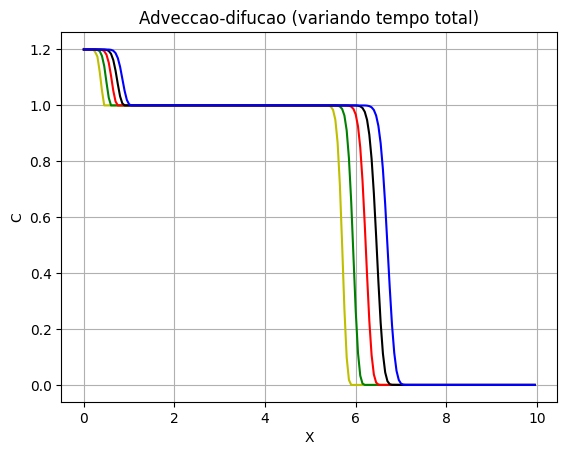

In [258]:
QsItr = []
xItr = []
for tTotal in tTotals:
    x, Qs = metodoEx(u,ca,cb,lX,tTotal,deltX,porcAvan)
    xItr = x
    QsItr.append(Qs)
    
i = 0
plt.figure()
colors = ['y','g','r','k','b','c']
plt.title(f'Adveccao-difucao (variando tempo total)')
for tTotal in tTotals:
    plt.plot(xItr,QsItr[i], color = colors[i])
    i+=1
plt.xlabel('X')
plt.ylabel('C')
plt.grid()
plt.show()

## Teste variação de deltaX
- $u = 0,25$
- $ \alpha = 0,1$
- ${C}_{A} = 1,0 $ 
- ${C}_{B} = 0,0 $
- ${L}_{x} = 10m$
- ${t}_{total} = 5$
- $\Delta x = varia$
- $\%\ de\ avanço = 1/2$

In [259]:
u = 0.25
alpha = 0.1
ca = 1.0
cb = 0.0
lXs = 10.0
tTotal = 5
deltXs = 0.05*np.array([0.6,0.8,1.0,1.2,1.4])
porcAvan = 1/2
# percentual de como os volumes estam preenchidos

numero de volumes: 333
valor passo de tempo deltaT: 0.096
numero de passos de tempo: 52
numero de volumes: 249
valor passo de tempo deltaT: 0.12800000000000003
numero de passos de tempo: 39
numero de volumes: 200
valor passo de tempo deltaT: 0.16000000000000003
numero de passos de tempo: 31
numero de volumes: 166
valor passo de tempo deltaT: 0.192
numero de passos de tempo: 26
numero de volumes: 142
valor passo de tempo deltaT: 0.22399999999999998
numero de passos de tempo: 22


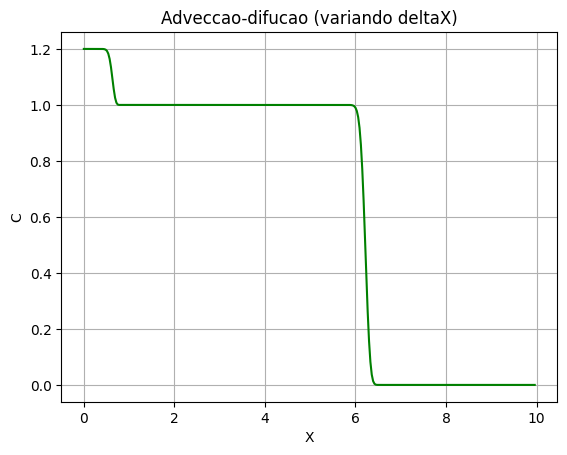

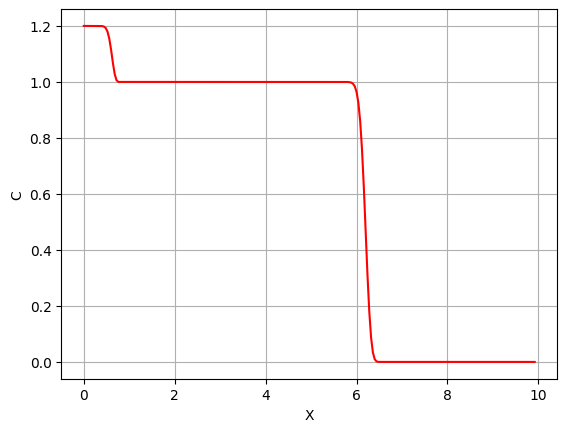

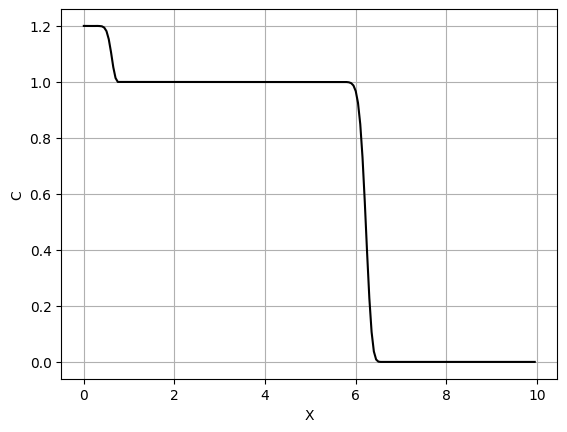

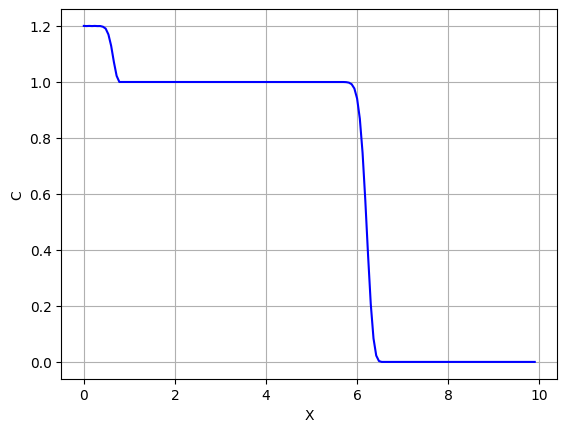

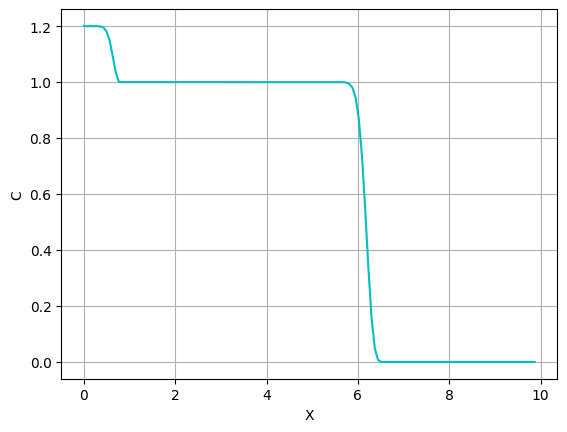

In [260]:
QsItr = []
xItr = []
for deltX in deltXs:
    x, Qs = metodoEx(u,ca,cb,lX,tTotal,deltX,porcAvan)
    xItr.append(x)
    QsItr.append(Qs)
    
i = 0
plt.figure()
colors = ['g','r','k','b','c']
plt.title(f'Adveccao-difucao (variando deltaX)')

for deltX in deltXs:
    plt.plot(xItr[i],QsItr[i], color = colors[i])
    plt.xlabel('X')
    plt.ylabel('C')
    plt.grid()
    plt.show()
    i+=1

## Teste variação da porcentagem de avanço
- $u = 0,25$
- $ \alpha = 0,1$
- ${C}_{A} = 1,0 $ 
- ${C}_{B} = 0,0 $
- ${L}_{x} = 10m$
- ${t}_{total} = 5$
- $\Delta x = 0,05$
- $\%\ de\ avanço = varia$

In [261]:
u = 0.25
alpha = 0.1
ca = 1.0
cb = 0.0
lXs = 10.0
tTotal = 5
deltX = 0.05
porcAvans = 1/2*np.array([0.6,0.8,1.0,1.2,1.4])
# percentual de como os volumes estam preenchidos

numero de volumes: 200
valor passo de tempo deltaT: 0.16000000000000003
numero de passos de tempo: 31
numero de volumes: 200
valor passo de tempo deltaT: 0.16000000000000003
numero de passos de tempo: 31
numero de volumes: 200
valor passo de tempo deltaT: 0.16000000000000003
numero de passos de tempo: 31
numero de volumes: 200
valor passo de tempo deltaT: 0.16000000000000003
numero de passos de tempo: 31
numero de volumes: 200
valor passo de tempo deltaT: 0.16000000000000003
numero de passos de tempo: 31


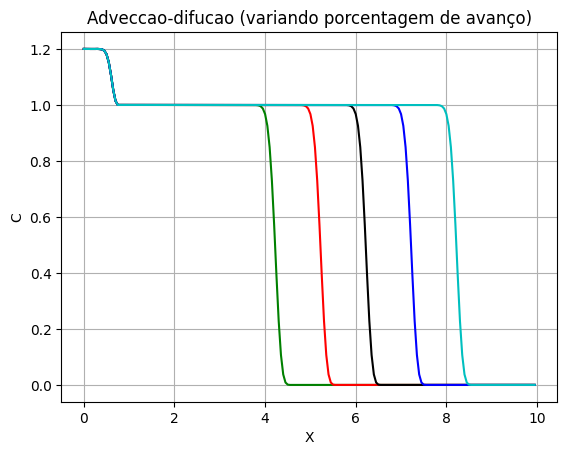

In [262]:
QsItr = []
xItr = []
for porcAvan in porcAvans:
    x, Qs = metodoEx(u,ca,cb,lX,tTotal,deltX,porcAvan)
    xItr = x
    QsItr.append(Qs)
    
i = 0
plt.figure()
colors = ['g','r','k','b','c']
plt.title(f'Adveccao-difucao (variando porcentagem de avanço)')
for porcAvan in porcAvans:
    plt.plot(xItr,QsItr[i], color = colors[i])
    i+=1
plt.xlabel('X')
plt.ylabel('C')
plt.grid()
plt.show()

## Testes de variação específica do código

### Teste de variação da vazão de Injeção
- $u = 0,25$
- $ \alpha = 0,1$
- ${C}_{A} = 1,0 $ 
- ${C}_{B} = 0,0 $
- ${L}_{x} = 10m$
- ${t}_{total} = 5$
- $\Delta x = 0,05$
- $\%\ de\ avanço = 1/2$
- $cItr = varia$

In [263]:
u = 0.25
ca = 1.0
cb = 0.0
lXs = 10.0
tTotal = 5
deltX = 0.05
porcAvans = 1/2
cInjItrs = 1.2*np.array([0.6,0.8,1.0,1.2,1.4])
# percentual de como os volumes estam preenchidos

In [264]:
def metodoExManipulado(u,ca,cb,lX,tTotal,deltX,porcAvan, cItr):
    # definicao do numero de volumes
    nx = int(lX/deltX)
    print(f'numero de volumes: {nx}')
    # definicao deltaT e passos de tempo
    # Considerando a condição de tempo do qual o método é estável
    deltT = 0.8*(1 /((u/deltX)))
    n = int(tTotal/deltT)
    print(f'valor passo de tempo deltaT: {deltT}')
    print(f'numero de passos de tempo: {n}')
    # inicializando o vetor considerando as condicoes de contorno
    qInit = []
    for i in range(nx):
        if i < int(nx*porcAvan):
            qInit.append(ca)
        if i >= int(nx*porcAvan):
            qInit.append(cb)
    # inicia o c iterativo
    #---------------------
    cItr = ca
    qFinal = qInit
    espaco = [0.0]
    for k in range(nx-1):
        espaco.append(espaco[k] + deltX)
    for i in range(n):
        qItr = []
        #-----------------
        #definição de mudança de vazão
        if i >= n/2:
            cItr = ca*cInjItr
        q0 = 2*cItr - qFinal[0]
        for j in range(nx):
            if j == 0:
                qItr.append(
                    qFinal[j] - (deltT/deltX)*
                    (u*(qFinal[j]-q0)))
            elif j == nx-1:
                qItr.append(qFinal[j] - (deltT/deltX)*
                            (u*(qFinal[j]-qFinal[j-1])))
            else:
                qItr.append(qFinal[j] - (deltT/deltX)*
                            (u*(qFinal[j]-qFinal[j-1])))
        qFinal = qItr
    return espaco, qFinal
    

numero de volumes: 200
valor passo de tempo deltaT: 0.16000000000000003
numero de passos de tempo: 31
numero de volumes: 200
valor passo de tempo deltaT: 0.16000000000000003
numero de passos de tempo: 31
numero de volumes: 200
valor passo de tempo deltaT: 0.16000000000000003
numero de passos de tempo: 31
numero de volumes: 200
valor passo de tempo deltaT: 0.16000000000000003
numero de passos de tempo: 31
numero de volumes: 200
valor passo de tempo deltaT: 0.16000000000000003
numero de passos de tempo: 31


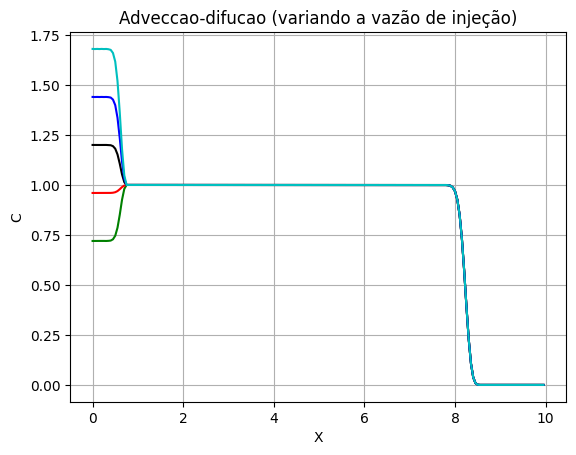

In [265]:
QsItr = []
xItr = []
for cInjItr in cInjItrs:
    x, Qs = metodoExManipulado(u,ca,cb,lX,tTotal,deltX,porcAvan, cInjItr)
    xItr = x
    QsItr.append(Qs)
    
i = 0
plt.figure()
colors = ['g','r','k','b','c']
plt.title(f'Adveccao-difucao (variando a vazão de injeção)')
for cInjItr in cInjItrs:
    plt.plot(xItr,QsItr[i], color = colors[i])
    i+=1
plt.xlabel('X')
plt.ylabel('C')
plt.grid()
plt.show()

### Teste de variação de deltaT forçados
- $u = 0,25$
- $ \alpha = 0,1$
- ${C}_{A} = 1,0 $ 
- ${C}_{B} = 0,0 $
- ${L}_{x} = 10m$
- ${t}_{total} = 5$
- $\Delta x = 0,05$
- $\%\ de\ avanço = 1/2$
- $\Delta t = 0,012$

In [273]:
u = 0.25
ca = 1.0
cb = 0.0
lXs = 10.0
tTotal = 5
deltX = 0.05
porcAvans = 1/2
deltTs = 0.0116*np.array([0.8,1.0,2.0])
# percentual de como os volumes estam preenchidos

In [274]:
def metodoExManipulado(u,ca,cb,lX,tTotal,deltX,porcAvan, deltT):
    # definicao do numero de volumes
    nx = int(lX/deltX)
    print(f'numero de volumes: {nx}')
    # definicao deltaT e passos de tempo
    # Considerando a condição de tempo do qual o método é estável
    #deltT = 0.9*(1 /((u/deltX)))
    n = int(tTotal/deltT)
    print(f'valor passo de tempo deltaT: {deltT}')
    print(f'numero de passos de tempo: {n}')
    # inicializando o vetor considerando as condicoes de contorno
    qInit = []
    for i in range(nx):
        if i < int(nx*porcAvan):
            qInit.append(ca)
        if i >= int(nx*porcAvan):
            qInit.append(cb)
    # inicia o c iterativo
    #---------------------
    cItr = ca
    qFinal = qInit
    espaco = [0.0]
    for k in range(nx-1):
        espaco.append(espaco[k] + deltX)
    for i in range(n):
        qItr = []
        #-----------------
        #definição de mudança de vazão
        if i >= n/2:
            cItr = ca*1.2
        q0 = 2*cItr - qFinal[0]
        for j in range(nx):
            if j == 0:
                qItr.append(
                    qFinal[j] - (deltT/deltX)*
                    (u*(qFinal[j]-q0)))
            elif j == nx-1:
                qItr.append(qFinal[j] - (deltT/deltX)*
                            (u*(qFinal[j]-qFinal[j-1])))
            else:
                qItr.append(qFinal[j] - (deltT/deltX)*
                            (u*(qFinal[j]-qFinal[j-1])))
        qFinal = qItr
    return espaco, qFinal
    

numero de volumes: 200
valor passo de tempo deltaT: 0.00928
numero de passos de tempo: 538
numero de volumes: 200
valor passo de tempo deltaT: 0.0116
numero de passos de tempo: 431
numero de volumes: 200
valor passo de tempo deltaT: 0.0232
numero de passos de tempo: 215


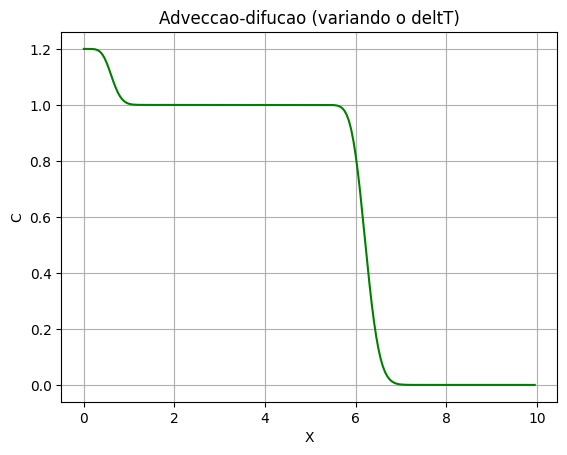

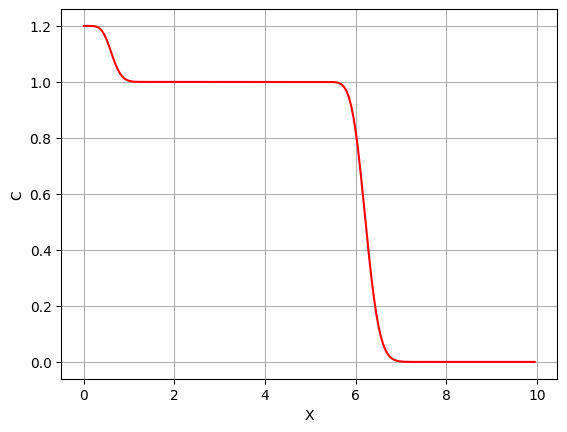

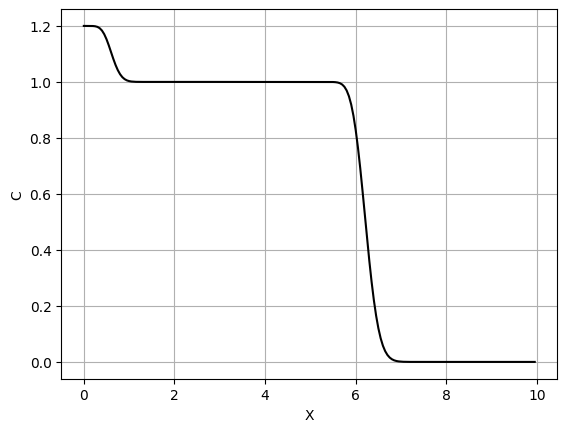

In [275]:
QsItr = []
xItr = []
for deltT in deltTs:
    x, Qs = metodoExManipulado(u,ca,cb,lX,tTotal,deltX,porcAvan, deltT)
    xItr.append(x)
    QsItr.append(Qs)
    
i = 0
plt.figure()
colors = ['g','r','k','b','c']
plt.title(f'Adveccao-difucao (variando o deltT)')
for deltT in deltTs:
    plt.plot(xItr[i],QsItr[i], color = colors[i])
    i+=1
    plt.xlabel('X')
    plt.ylabel('C')
    plt.grid()
    plt.show()

### van Leer

## Dados do problema
- $u = 0.25$
- ${C}_{A} = 1,0 $ 
- ${C}_{B} = 0,0 $
- ${L}_{x} = 10m$
- ${t}_{total} = 5$
- $\Delta x = 0,05$
- $\%\ de\ avanço = 1/2$

Inicializando a variáveis

In [249]:
u = 0.25
ca = 1.0
cb = 0.0
lX = 10.0
tTotal = 5
deltX = 0.05
porcAvan = 1/2
# percentual de como os volumes estam preenchidos

In [250]:
def metodoEx(u,ca,cb,lX,tTotal,deltX,porcAvan):
    # definicao do numero de volumes
    nx = int(lX/deltX)
    print(f'numero de volumes: {nx}')
    # definicao deltaT e passos de tempo
    # Considerando a condição de tempo do qual o método é estável
    deltT = 0.8*(1 /((u/deltX)))
    n = int(tTotal/deltT)
    print(f'valor passo de tempo deltaT: {deltT}')
    print(f'numero de passos de tempo: {n}')
    # inicializando o vetor considerando as condicoes de contorno
    qInit = []
    for i in range(nx):
        if i < int(nx*porcAvan):
            qInit.append(ca)
        if i >= int(nx*porcAvan):
            qInit.append(cb)
    # inicia o c iterativo
    #---------------------
    cItr = ca
    qFinal = qInit
    espaco = [0.0]
    for k in range(nx-1):
        espaco.append(espaco[k] + deltX)
    for i in range(n):
        qItr = []
        #-----------------
        #definição de mudança de vazão
        if i >= n/2:
            cItr = ca*1.2
        q0 = 2*cItr - qFinal[0]
        for j in range(nx):
            if j == 0:
                theta1_2 = ((qFinal[j] - q0)/(qFinal[j+1] -qFinal[j]))
                psiTheta1_2 = ((theta1_2 + abs(theta1_2))/(1 + theta1_2))
                qItr.append(
                    qFinal[j] - (deltT/deltX)*
                    (u*(qFinal[j]-q0)))
            elif j == nx-1:
                theta1_2 = ((qFinal[j] - q0)/(qFinal[j+1] -qFinal[j]))
                psiTheta1_2 = ((theta1_2 + abs(theta1_2))/(1 + theta1_2))
                qItr.append(qFinal[j] - (deltT/deltX)*
                            (u*(qFinal[j]-qFinal[j-1])))
            else:
                theta1_2 = ((qFinal[j] - q0)/(qFinal[j+1] -qFinal[j]))
                psiTheta1_2 = ((theta1_2 + abs(theta1_2))/(1 + theta1_2))
                qItr.append(qFinal[j] - (deltT/deltX)*
                            (u*(qFinal[j]-qFinal[j-1])))
        qFinal = qItr
    return espaco, qFinal
    

In [251]:
x, Qs = metodoEx(u,ca,cb,lX,tTotal,deltX,porcAvan)

numero de volumes: 200
valor passo de tempo deltaT: 0.16000000000000003
numero de passos de tempo: 31


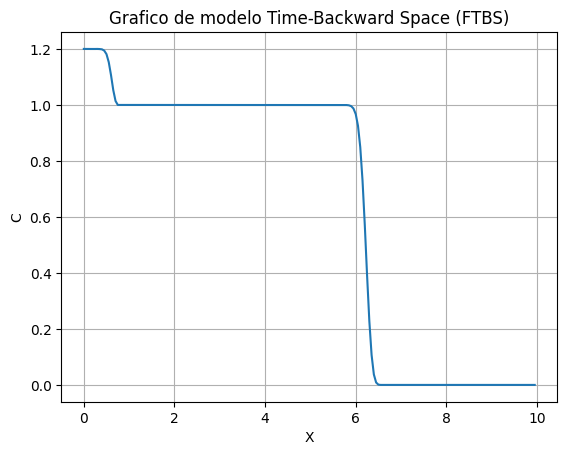

In [252]:
plt.figure()
plt.title(f'van Leer')
plt.plot(x,Qs)
plt.xlabel('X')
plt.ylabel('C')
plt.grid()
plt.show()

## Teste variação da velocidade de advecção
- $u = varia$
- $ \alpha = 0,1$
- ${C}_{A} = 1,0 $ 
- ${C}_{B} = 0,0 $
- ${L}_{x} = 10m$
- ${t}_{total} = 5$
- $\Delta x = 0,05$
- $\%\ de\ avanço = 1/2$

In [253]:
us = 0.25*np.array([0.6,0.8,1.0,1.2,1.4])
alpha = 0.1
ca = 1.0
cb = 0.0
lX = 10.0
tTotal = 5
deltX = 0.05
porcAvan = 1/2
# percentual de como os volumes estam preenchidos

numero de volumes: 200
valor passo de tempo deltaT: 0.2666666666666667
numero de passos de tempo: 18
numero de volumes: 200
valor passo de tempo deltaT: 0.2
numero de passos de tempo: 25
numero de volumes: 200
valor passo de tempo deltaT: 0.16000000000000003
numero de passos de tempo: 31
numero de volumes: 200
valor passo de tempo deltaT: 0.13333333333333336
numero de passos de tempo: 37
numero de volumes: 200
valor passo de tempo deltaT: 0.11428571428571431
numero de passos de tempo: 43


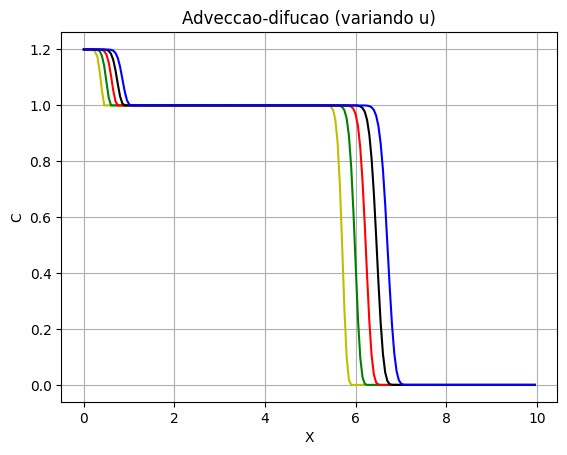

In [254]:
QsItr = []
xItr = []
for u in us:
    x, Qs = metodoEx(u,ca,cb,lX,tTotal,deltX,porcAvan)
    xItr = x
    QsItr.append(Qs)
    
i = 0
plt.figure()
colors = ['y','g','r','k','b','c']
plt.title(f'van Leer (variando u)')
for u in us:
    plt.plot(xItr,QsItr[i], color = colors[i])
    i+=1
plt.xlabel('X')
plt.ylabel('C')
plt.grid()
plt.show()

## Teste variação do Lx
- $u = 0,25$
- $ \alpha = varia$
- ${C}_{A} = 1,0 $ 
- ${C}_{B} = 0,0 $
- ${L}_{x} = varia$
- ${t}_{total} = 5$
- $\Delta x = 0,05$
- $\%\ de\ avanço = 1/2$

In [255]:
u = 0.25
alpha = 0.1
ca = 1.0
cb = 0.0
lXs = 10.0*np.array([0.6,0.8,1.0,1.2,1.4])
tTotal = 5
deltX = 0.05
porcAvan = 1/2
# percentual de como os volumes estam preenchidos

numero de volumes: 120
valor passo de tempo deltaT: 0.16000000000000003
numero de passos de tempo: 31
numero de volumes: 160
valor passo de tempo deltaT: 0.16000000000000003
numero de passos de tempo: 31
numero de volumes: 200
valor passo de tempo deltaT: 0.16000000000000003
numero de passos de tempo: 31
numero de volumes: 240
valor passo de tempo deltaT: 0.16000000000000003
numero de passos de tempo: 31
numero de volumes: 280
valor passo de tempo deltaT: 0.16000000000000003
numero de passos de tempo: 31


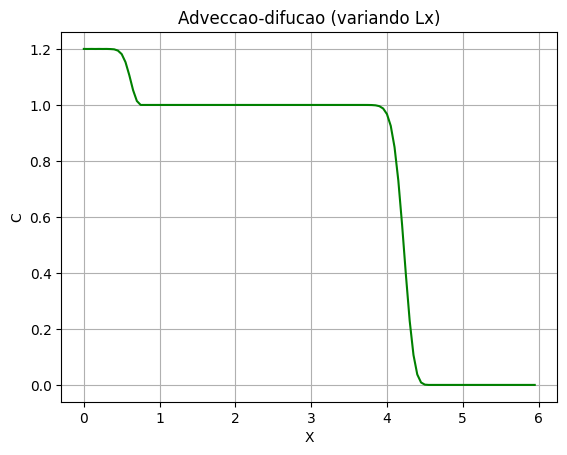

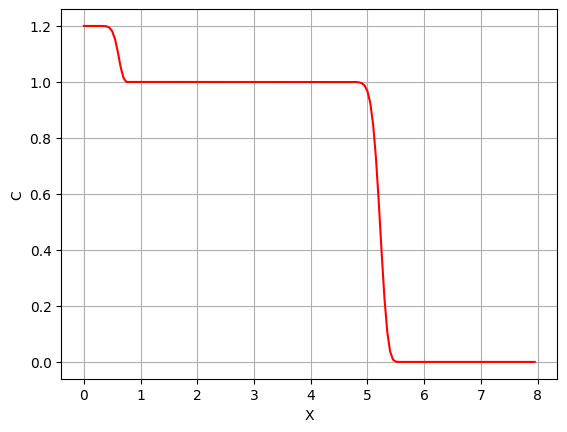

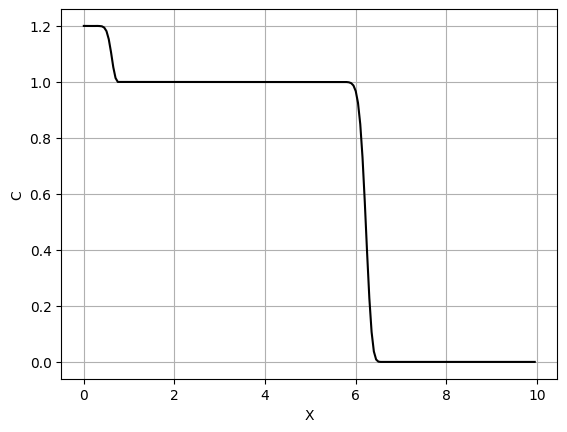

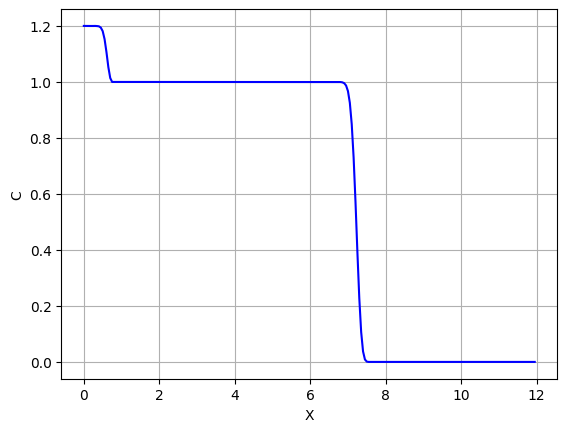

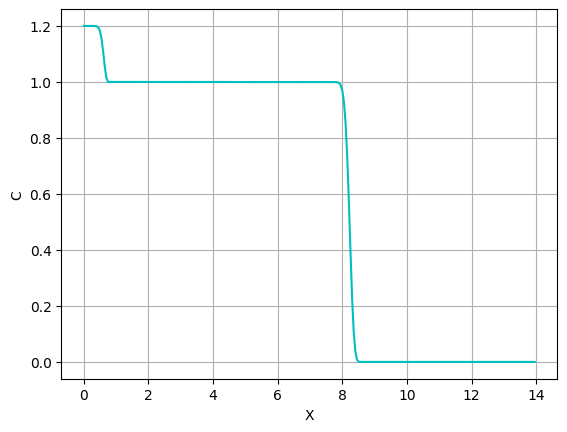

In [256]:
QsItr = []
xItr = []
for lX in lXs:
    x, Qs = metodoEx(u,ca,cb,lX,tTotal,deltX,porcAvan)
    xItr.append(x)
    QsItr.append(Qs)
    
i = 0
plt.figure()
colors = ['g','r','k','b','c']
plt.title(f'van Leer (variando Lx)')

for lX in lXs:
    plt.plot(xItr[i],QsItr[i], color = colors[i])
    plt.xlabel('X')
    plt.ylabel('C')
    plt.grid()
    plt.show()
    i+=1

## Teste variação do tempo totalX
- $u = 0,25$
- $ \alpha = 0,1$
- ${C}_{A} = 1,0 $ 
- ${C}_{B} = 0,0 $
- ${L}_{x} = 10m$
- ${t}_{total} = varia$
- $\Delta x = 0,05$
- $\%\ de\ avanço = 1/2$

In [257]:
u = 0.25
alpha = 0.1
ca = 1.0
cb = 0.0
lX = 10.0
tTotals = 5*np.array([0.6,0.8,1.0,1.2,1.4])
deltX = 0.05
porcAvan = 1/2
# percentual de como os volumes estam preenchidos

numero de volumes: 200
valor passo de tempo deltaT: 0.16000000000000003
numero de passos de tempo: 18
numero de volumes: 200
valor passo de tempo deltaT: 0.16000000000000003
numero de passos de tempo: 24
numero de volumes: 200
valor passo de tempo deltaT: 0.16000000000000003
numero de passos de tempo: 31
numero de volumes: 200
valor passo de tempo deltaT: 0.16000000000000003
numero de passos de tempo: 37
numero de volumes: 200
valor passo de tempo deltaT: 0.16000000000000003
numero de passos de tempo: 43


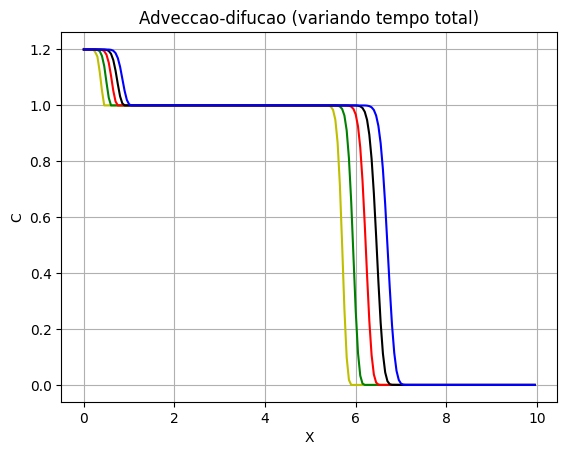

In [258]:
QsItr = []
xItr = []
for tTotal in tTotals:
    x, Qs = metodoEx(u,ca,cb,lX,tTotal,deltX,porcAvan)
    xItr = x
    QsItr.append(Qs)
    
i = 0
plt.figure()
colors = ['y','g','r','k','b','c']
plt.title(f'van Leer (variando tempo total)')
for tTotal in tTotals:
    plt.plot(xItr,QsItr[i], color = colors[i])
    i+=1
plt.xlabel('X')
plt.ylabel('C')
plt.grid()
plt.show()

## Teste variação de deltaX
- $u = 0,25$
- $ \alpha = 0,1$
- ${C}_{A} = 1,0 $ 
- ${C}_{B} = 0,0 $
- ${L}_{x} = 10m$
- ${t}_{total} = 5$
- $\Delta x = varia$
- $\%\ de\ avanço = 1/2$

In [259]:
u = 0.25
alpha = 0.1
ca = 1.0
cb = 0.0
lXs = 10.0
tTotal = 5
deltXs = 0.05*np.array([0.6,0.8,1.0,1.2,1.4])
porcAvan = 1/2
# percentual de como os volumes estam preenchidos

numero de volumes: 333
valor passo de tempo deltaT: 0.096
numero de passos de tempo: 52
numero de volumes: 249
valor passo de tempo deltaT: 0.12800000000000003
numero de passos de tempo: 39
numero de volumes: 200
valor passo de tempo deltaT: 0.16000000000000003
numero de passos de tempo: 31
numero de volumes: 166
valor passo de tempo deltaT: 0.192
numero de passos de tempo: 26
numero de volumes: 142
valor passo de tempo deltaT: 0.22399999999999998
numero de passos de tempo: 22


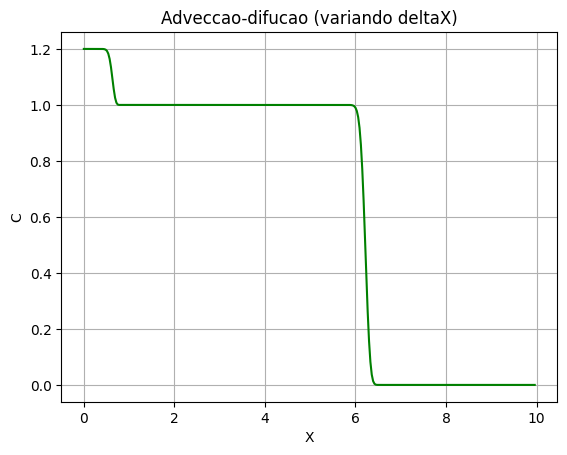

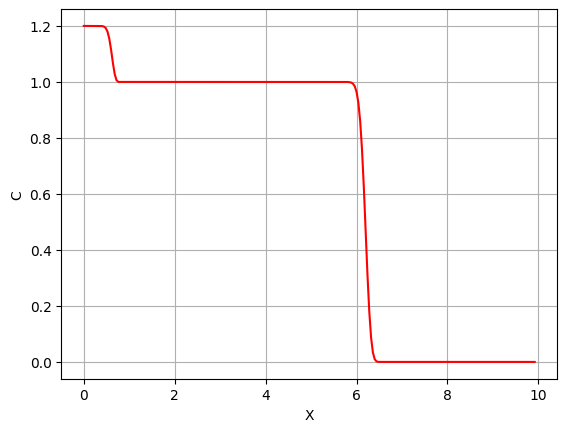

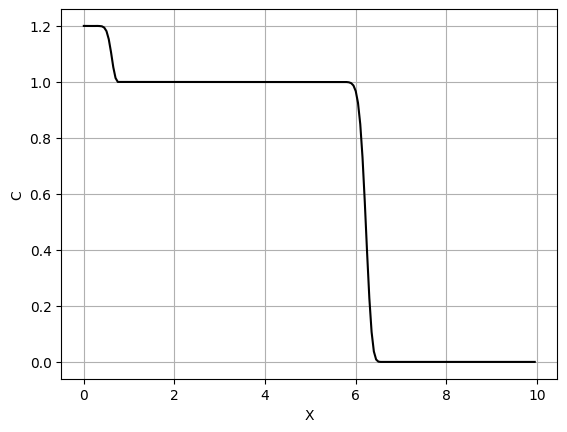

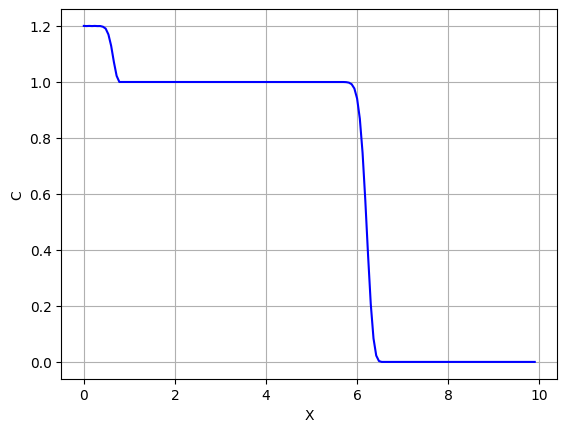

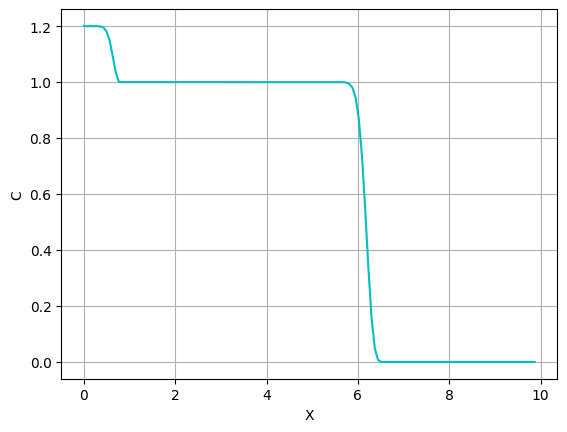

In [260]:
QsItr = []
xItr = []
for deltX in deltXs:
    x, Qs = metodoEx(u,ca,cb,lX,tTotal,deltX,porcAvan)
    xItr.append(x)
    QsItr.append(Qs)
    
i = 0
plt.figure()
colors = ['g','r','k','b','c']
plt.title(f'van Leer (variando deltaX)')

for deltX in deltXs:
    plt.plot(xItr[i],QsItr[i], color = colors[i])
    plt.xlabel('X')
    plt.ylabel('C')
    plt.grid()
    plt.show()
    i+=1

## Teste variação da porcentagem de avanço
- $u = 0,25$
- $ \alpha = 0,1$
- ${C}_{A} = 1,0 $ 
- ${C}_{B} = 0,0 $
- ${L}_{x} = 10m$
- ${t}_{total} = 5$
- $\Delta x = 0,05$
- $\%\ de\ avanço = varia$

In [261]:
u = 0.25
alpha = 0.1
ca = 1.0
cb = 0.0
lXs = 10.0
tTotal = 5
deltX = 0.05
porcAvans = 1/2*np.array([0.6,0.8,1.0,1.2,1.4])
# percentual de como os volumes estam preenchidos

numero de volumes: 200
valor passo de tempo deltaT: 0.16000000000000003
numero de passos de tempo: 31
numero de volumes: 200
valor passo de tempo deltaT: 0.16000000000000003
numero de passos de tempo: 31
numero de volumes: 200
valor passo de tempo deltaT: 0.16000000000000003
numero de passos de tempo: 31
numero de volumes: 200
valor passo de tempo deltaT: 0.16000000000000003
numero de passos de tempo: 31
numero de volumes: 200
valor passo de tempo deltaT: 0.16000000000000003
numero de passos de tempo: 31


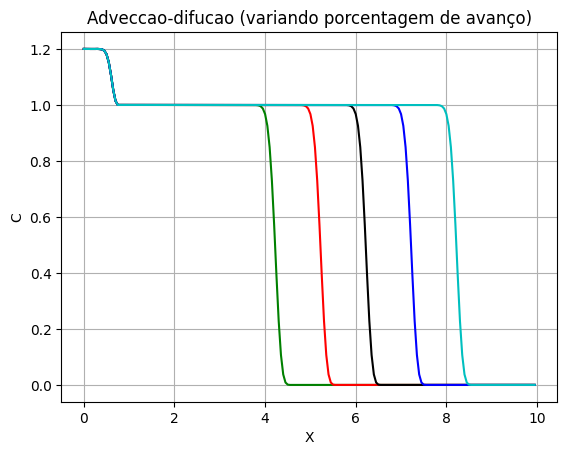

In [262]:
QsItr = []
xItr = []
for porcAvan in porcAvans:
    x, Qs = metodoEx(u,ca,cb,lX,tTotal,deltX,porcAvan)
    xItr = x
    QsItr.append(Qs)
    
i = 0
plt.figure()
colors = ['g','r','k','b','c']
plt.title(f'van Leer (variando porcentagem de avanço)')
for porcAvan in porcAvans:
    plt.plot(xItr,QsItr[i], color = colors[i])
    i+=1
plt.xlabel('X')
plt.ylabel('C')
plt.grid()
plt.show()

## Testes de variação específica do código

### Teste de variação da vazão de Injeção
- $u = 0,25$
- $ \alpha = 0,1$
- ${C}_{A} = 1,0 $ 
- ${C}_{B} = 0,0 $
- ${L}_{x} = 10m$
- ${t}_{total} = 5$
- $\Delta x = 0,05$
- $\%\ de\ avanço = 1/2$
- $cItr = varia$

In [263]:
u = 0.25
ca = 1.0
cb = 0.0
lXs = 10.0
tTotal = 5
deltX = 0.05
porcAvans = 1/2
cInjItrs = 1.2*np.array([0.6,0.8,1.0,1.2,1.4])
# percentual de como os volumes estam preenchidos

In [264]:
def metodoExManipulado(u,ca,cb,lX,tTotal,deltX,porcAvan, cItr):
    # definicao do numero de volumes
    nx = int(lX/deltX)
    print(f'numero de volumes: {nx}')
    # definicao deltaT e passos de tempo
    # Considerando a condição de tempo do qual o método é estável
    deltT = 0.8*(1 /((u/deltX)))
    n = int(tTotal/deltT)
    print(f'valor passo de tempo deltaT: {deltT}')
    print(f'numero de passos de tempo: {n}')
    # inicializando o vetor considerando as condicoes de contorno
    qInit = []
    for i in range(nx):
        if i < int(nx*porcAvan):
            qInit.append(ca)
        if i >= int(nx*porcAvan):
            qInit.append(cb)
    # inicia o c iterativo
    #---------------------
    cItr = ca
    qFinal = qInit
    espaco = [0.0]
    for k in range(nx-1):
        espaco.append(espaco[k] + deltX)
    for i in range(n):
        qItr = []
        #-----------------
        #definição de mudança de vazão
        if i >= n/2:
            cItr = ca*cInjItr
        q0 = 2*cItr - qFinal[0]
        for j in range(nx):
            if j == 0:
                qItr.append(
                    qFinal[j] - (deltT/deltX)*
                    (u*(qFinal[j]-q0)))
            elif j == nx-1:
                qItr.append(qFinal[j] - (deltT/deltX)*
                            (u*(qFinal[j]-qFinal[j-1])))
            else:
                qItr.append(qFinal[j] - (deltT/deltX)*
                            (u*(qFinal[j]-qFinal[j-1])))
        qFinal = qItr
    return espaco, qFinal
    

numero de volumes: 200
valor passo de tempo deltaT: 0.16000000000000003
numero de passos de tempo: 31
numero de volumes: 200
valor passo de tempo deltaT: 0.16000000000000003
numero de passos de tempo: 31
numero de volumes: 200
valor passo de tempo deltaT: 0.16000000000000003
numero de passos de tempo: 31
numero de volumes: 200
valor passo de tempo deltaT: 0.16000000000000003
numero de passos de tempo: 31
numero de volumes: 200
valor passo de tempo deltaT: 0.16000000000000003
numero de passos de tempo: 31


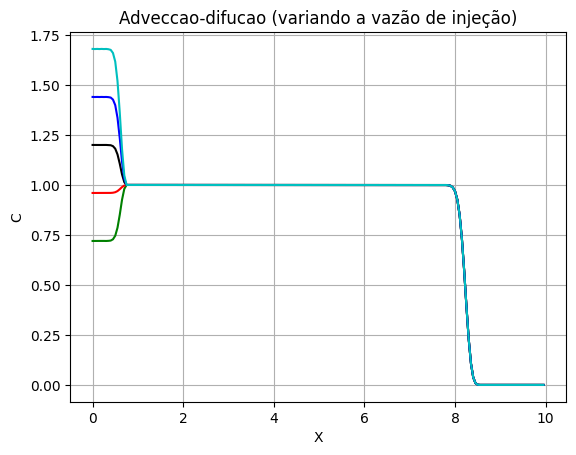

In [265]:
QsItr = []
xItr = []
for cInjItr in cInjItrs:
    x, Qs = metodoExManipulado(u,ca,cb,lX,tTotal,deltX,porcAvan, cInjItr)
    xItr = x
    QsItr.append(Qs)
    
i = 0
plt.figure()
colors = ['g','r','k','b','c']
plt.title(f'van Leer (variando a vazão de injeção)')
for cInjItr in cInjItrs:
    plt.plot(xItr,QsItr[i], color = colors[i])
    i+=1
plt.xlabel('X')
plt.ylabel('C')
plt.grid()
plt.show()

### Teste de variação de deltaT forçados
- $u = 0,25$
- $ \alpha = 0,1$
- ${C}_{A} = 1,0 $ 
- ${C}_{B} = 0,0 $
- ${L}_{x} = 10m$
- ${t}_{total} = 5$
- $\Delta x = 0,05$
- $\%\ de\ avanço = 1/2$
- $\Delta t = 0,012$

In [273]:
u = 0.25
ca = 1.0
cb = 0.0
lXs = 10.0
tTotal = 5
deltX = 0.05
porcAvans = 1/2
deltTs = 0.0116*np.array([0.8,1.0,2.0])
# percentual de como os volumes estam preenchidos

In [274]:
def metodoExManipulado(u,ca,cb,lX,tTotal,deltX,porcAvan, deltT):
    # definicao do numero de volumes
    nx = int(lX/deltX)
    print(f'numero de volumes: {nx}')
    # definicao deltaT e passos de tempo
    # Considerando a condição de tempo do qual o método é estável
    #deltT = 0.9*(1 /((u/deltX)))
    n = int(tTotal/deltT)
    print(f'valor passo de tempo deltaT: {deltT}')
    print(f'numero de passos de tempo: {n}')
    # inicializando o vetor considerando as condicoes de contorno
    qInit = []
    for i in range(nx):
        if i < int(nx*porcAvan):
            qInit.append(ca)
        if i >= int(nx*porcAvan):
            qInit.append(cb)
    # inicia o c iterativo
    #---------------------
    cItr = ca
    qFinal = qInit
    espaco = [0.0]
    for k in range(nx-1):
        espaco.append(espaco[k] + deltX)
    for i in range(n):
        qItr = []
        #-----------------
        #definição de mudança de vazão
        if i >= n/2:
            cItr = ca*1.2
        q0 = 2*cItr - qFinal[0]
        for j in range(nx):
            if j == 0:
                qItr.append(
                    qFinal[j] - (deltT/deltX)*
                    (u*(qFinal[j]-q0)))
            elif j == nx-1:
                qItr.append(qFinal[j] - (deltT/deltX)*
                            (u*(qFinal[j]-qFinal[j-1])))
            else:
                qItr.append(qFinal[j] - (deltT/deltX)*
                            (u*(qFinal[j]-qFinal[j-1])))
        qFinal = qItr
    return espaco, qFinal
    

numero de volumes: 200
valor passo de tempo deltaT: 0.00928
numero de passos de tempo: 538
numero de volumes: 200
valor passo de tempo deltaT: 0.0116
numero de passos de tempo: 431
numero de volumes: 200
valor passo de tempo deltaT: 0.0232
numero de passos de tempo: 215


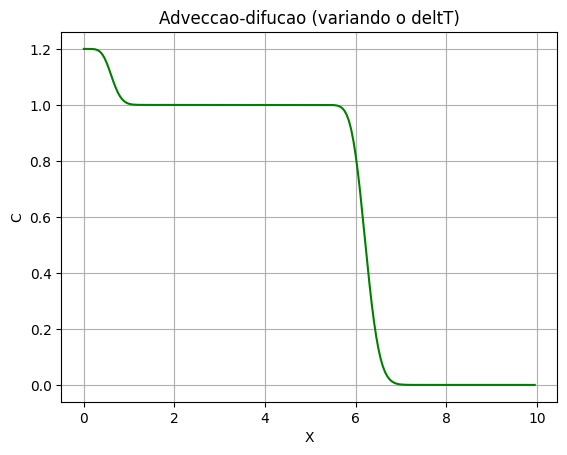

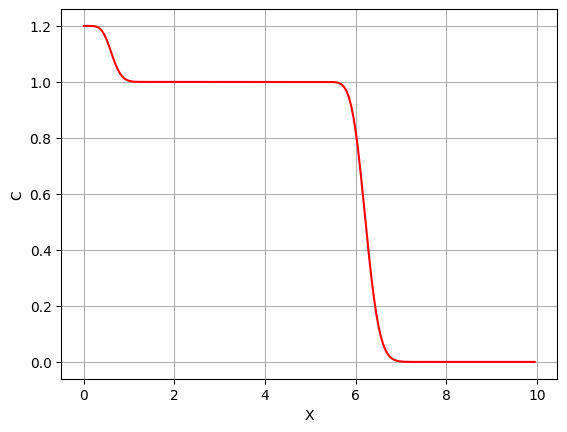

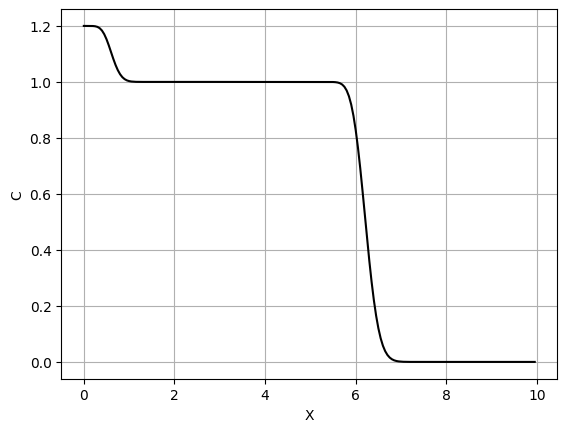

In [275]:
QsItr = []
xItr = []
for deltT in deltTs:
    x, Qs = metodoExManipulado(u,ca,cb,lX,tTotal,deltX,porcAvan, deltT)
    xItr.append(x)
    QsItr.append(Qs)
    
i = 0
plt.figure()
colors = ['g','r','k','b','c']
plt.title(f'van Leer (variando o deltT)')
for deltT in deltTs:
    plt.plot(xItr[i],QsItr[i], color = colors[i])
    i+=1
    plt.xlabel('X')
    plt.ylabel('C')
    plt.grid()
    plt.show()